# TASK1

Если увеличивать ширину гауссова окна STD без увеличения количества элементов в окне M, это окно становится ближе к прямоугольному, более высокие частоты подавляются хуже, и следующие параметры проявляются боковым лепестком.

# TASK2

In [9]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import scipy.signal

import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

Рассмотрим Гауссовский пример:

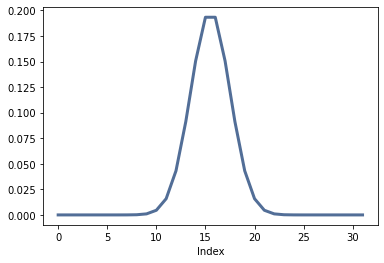

In [3]:
gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
thinkplot.plot(gaussian)
thinkplot.config(xlabel='Index')

Отобразим FFT:

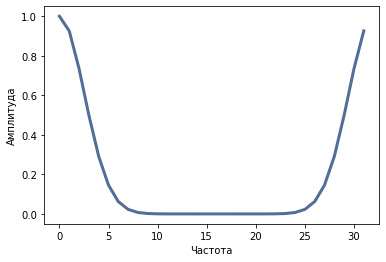

In [5]:
fft_gaussian = np.fft.fft(gaussian)
thinkplot.plot(abs(fft_gaussian))
thinkplot.config(xlabel='Частота', ylabel='Амплитуда')

В случае поворота отрицательных частот влево, то сможем более явно наблюдать Гауссовский пример:

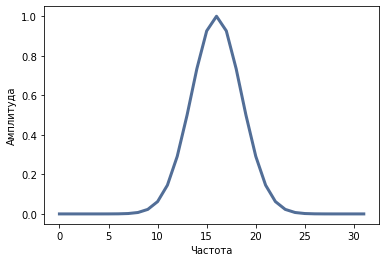

In [6]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
thinkplot.plot(abs(fft_rolled))
thinkplot.config(xlabel='Частота', ylabel='Амплитуда')

С помощью данной функции мы можем увидеть окно Гаусса и его DFT:

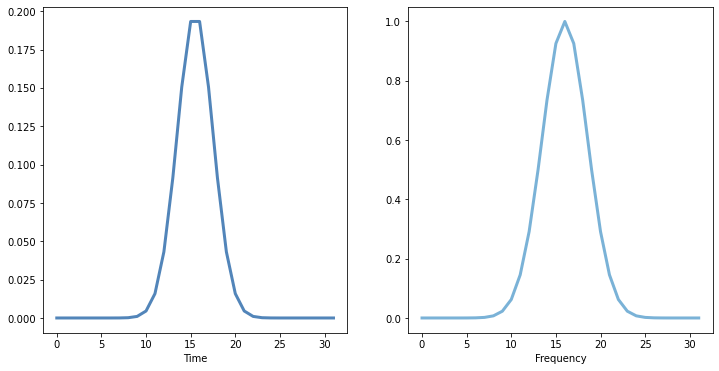

In [8]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    thinkplot.preplot(num=2, cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Time', legend=False)

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    thinkplot.subplot(2)
    thinkplot.plot(abs(fft_rolled))
    thinkplot.config(xlabel='Frequency')

    
plot_gaussian(2)

Теперь мы можем проделать манипуляции, которые покажут, что произойдет при изменении std.

In [10]:
slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

По мере увеличения std гауссиан становится шире, а его FFT сужается.

С точки зрения непрерывной математики, если

𝑓 (𝑥) = 𝑒 − 𝑎𝑥2
который является гауссовским со средним 0 и стандартным отклонением 1 /, его преобразование Фурье имеет вид

𝐹 (𝑘) = 𝜋𝑎⎯⎯⎯√𝑒 − 𝜋2𝑘2 / 𝑎
который является гауссовским со стандартным отклонением / 𝜋2. Таким образом, между стандартными отклонениями 𝑓 и существует обратная зависимость.

# TASK3

Создадим волну в одну секунду с частотой дискретизации 44 кГц.

In [15]:
signal = thinkdsp.SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44000)

Затем создадим несколько окон. Выберем стандартное отклонение окна Гаусса, чтобы сделать его похожим на другие.

In [49]:
M = 17
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [gaussian, blackman, hamming, hanning]
names = ['gaussian', 'blackman', 'hamming', 'hanning']

for window in windows:
    window /= sum(window)

Отобразим их:

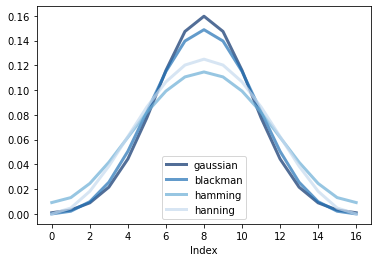

In [50]:
thinkplot.preplot(4)
for window, name in zip(windows, names):
    thinkplot.plot(window, label=name)

thinkplot.config(xlabel='Index', legend=True, loc='lower center')

Рассмотрим их DFT:

In [51]:
def plot_window_dfts(windows, names):
    thinkplot.preplot(4)

    for window, name in zip(windows, names):
        padded = thinkdsp.zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        thinkplot.plot(abs(dft_window), label=name)

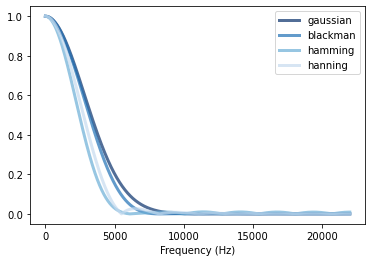

In [52]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', loc='upper right')

Стоит отметить, что Гауссово падает быстрее всех, Блэкман - самым медленным, а у Ханнинга самые заметные боковые лепестки

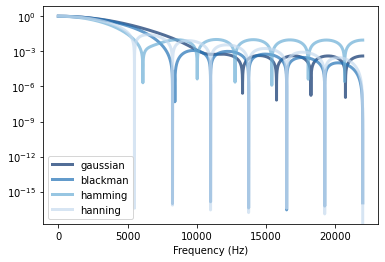

In [53]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', yscale='log', loc='lower left')

В логарифмической шкале мы видим, что сначала значения Хэмминга и Хеннинга падают быстрее, чем два других. И окна Хэмминга и Гаусса, кажется, имеют самые стойкие боковые лепестки. Окно Ханнинга может иметь наилучшее сочетание быстрого падения и минимальных боковых лепестков.